# Kenya Fiscal Landscape Analysis

## This analysis provides a comprehensive overview of Kenya's fiscal trajectory from 1999 to 2024. By integrating three critical datasets - Public debt, Interest Payments, and Annual GDP - the project quantifies the evolving relationship between national borrowing and economic output. The primary objectice is to evaluate the cost of debt servicing and access how effectively the country's growth supports its increasing financial obligations.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
# load interest payments
interest_df = pd.read_excel("Interest Payments.xlsx")
# load public debt
debt_df = pd.read_csv('Public Debt (Ksh Million).csv')
#load annual gdp
gdp_df = pd.read_csv('Annual GDP.csv')

In [3]:
# Checking the columns and data types
print("\nDebt\n", debt_df.info())
print("\nInterest\n", interest_df.info())
print("GDP\n", gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           262 non-null    int64 
 1   Month          262 non-null    object
 2   Domestic Debt  262 non-null    object
 3   External Debt  262 non-null    object
 4   Total          262 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.4+ KB

Debt
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               299 non-null    int64  
 1   Month              299 non-null    int64  
 2   Domestic Interest  299 non-null    float64
 3   Foreign Interest   299 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 9.5 KB

Interest
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data

In [4]:
# Checking for null values
# Annual GDP
print("\nAnnual GDP\n", gdp_df.isnull().sum().sum())
# Interest Payment
print("\nInterest Payment\n", interest_df.isnull().sum().sum())
# Public Debt
print("\nPublic Debt\n", debt_df.isnull().sum().sum())


Annual GDP
 0

Interest Payment
 0

Public Debt
 0


# Exploratory Data Analysis (E.D.A)

## Data Cleaning

In [5]:
# Clean Public debt data
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
debt_df['Month'] = debt_df['Month'].str.strip().map(month_map)
debt_df.head()


,Year,Month,Domestic Debt,External Debt,Total
0,2021,12,"4,032,368.18","4,174,371.53","8,206,739.71"
1,2021,11,"4,008,077.30","4,109,282.85","8,117,360.15"
2,2021,10,"3,959,523.30","4,083,124.54","8,042,647.84"
3,2021,9,"3,937,777.45","4,062,504.78","8,000,282.23"
4,2021,8,"3,864,875.78","4,054,862.85","7,919,738.63"


In [6]:
# function to remove commas and convert to float
def to_numeric(col):
  if col.dtype == 'object':
    return pd.to_numeric(col.str.replace(',', ''), errors='coerce')
  return col

# We convert debt columns to numeric
debt_cols = ['Domestic Debt', 'External Debt', 'Total']
for col in debt_cols:
  debt_df[col] = to_numeric(debt_df[col])

# Clean GDP Data
gdp_df['Nominal GDP'] = to_numeric(gdp_df['Nominal GDP prices (Ksh Million)'])
gdp_df = gdp_df[["Year", "Nominal GDP", "Annual GDP growth (%)"]]

In [7]:
# Merging datasets
# Merge debt and Interest on Year and Month
merged_df = pd.merge(debt_df, interest_df, on=['Year', 'Month'], how='inner') # merging on matching rows

#merge with annual gdp on Year
final_df = pd.merge(merged_df, gdp_df, on='Year', how='left') # all rows from the left (merged df) and only matching rows from the right table

In [8]:
# create a date column for plotting
final_df['Date'] = pd.to_datetime(final_df[['Year', 'Month']].assign(day=1)) # 2024/03/01,
final_df = final_df.sort_values('Date')

In [9]:
# Dropping nulls
final_df = final_df.dropna()

In [10]:
# Feature engineering
# Effective Interest Rates (%)
final_df['Domestic Interest Rate (%)'] = (final_df['Domestic Interest']/final_df['Domestic Debt'])*100
final_df['Foreign Interest Rate (%)'] = (final_df['Foreign Interest']/ final_df['External Debt']) * 100

# Debt-to-GDP Ratio (%)
final_df['Debt_to_GDP (%)'] = (final_df['Total']/final_df['Nominal GDP']) * 100

## Visualization

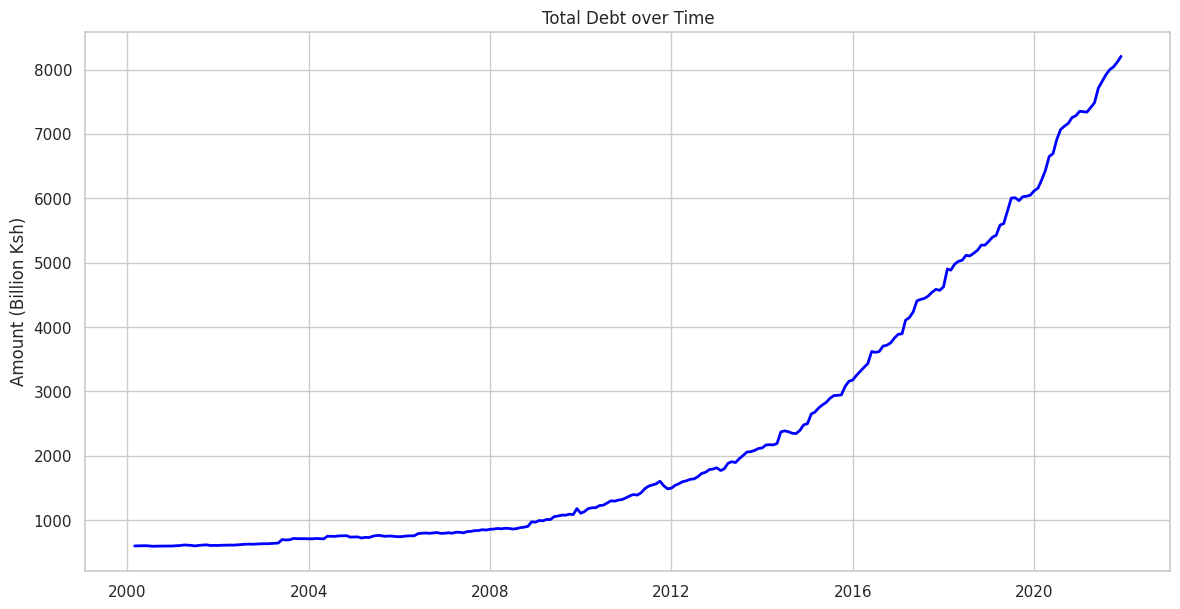

<Figure size 640x480 with 0 Axes>

In [11]:
# Debt Trend over Time
sns.set_theme(style='whitegrid')
plt.figure(figsize=(14,7))
plt.plot(final_df['Date'], final_df['Total']/1000, color='blue', linewidth=2)
plt.title("Total Debt over Time")
plt.ylabel("Amount (Billion Ksh)")
plt.show()
plt.savefig('debt_trend.png')

## The debt grows slowly from 2000 - 2008, then from 2008-2012 there's a steady increase, then from 2012 the debt growth is exponential.

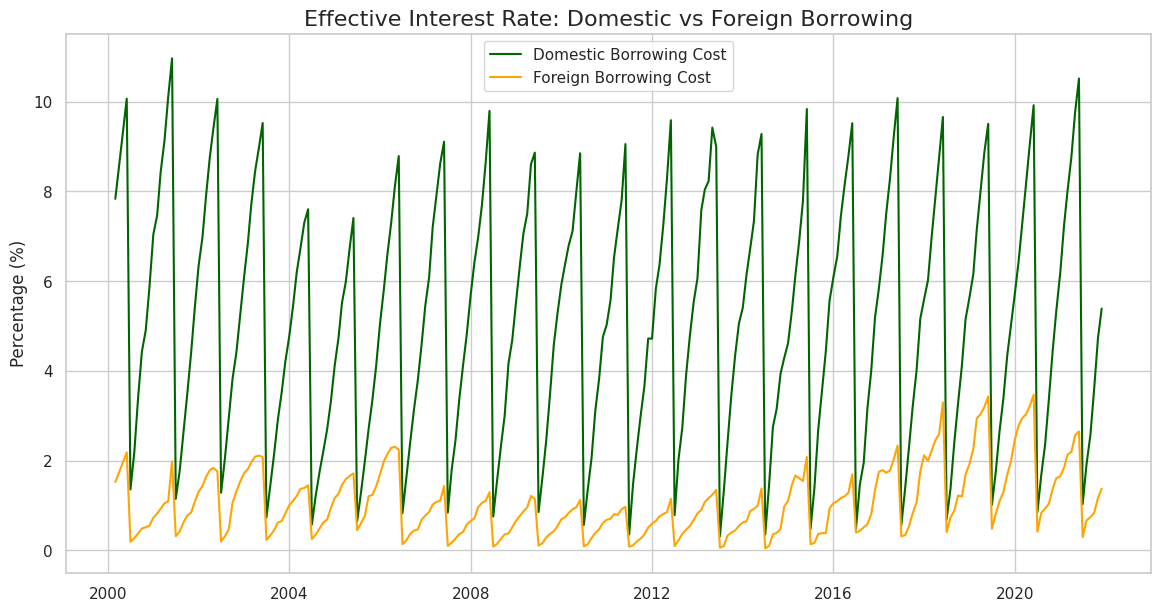

<Figure size 640x480 with 0 Axes>

In [12]:
# Interest Rate comparison Plot
plt.figure(figsize=(14,7))
plt.plot(final_df['Date'], final_df['Domestic Interest Rate (%)'], label='Domestic Borrowing Cost',
         color='darkgreen')
plt.plot(final_df['Date'], final_df['Foreign Interest Rate (%)'], label='Foreign Borrowing Cost', color='orange')
plt.title("Effective Interest Rate: Domestic vs Foreign Borrowing", fontsize=16)
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()
plt.savefig('interest_rate.png')

## We can see that domestic debt is about 5x more expensive to service than foreign debt-this is interms of interest rate charged.

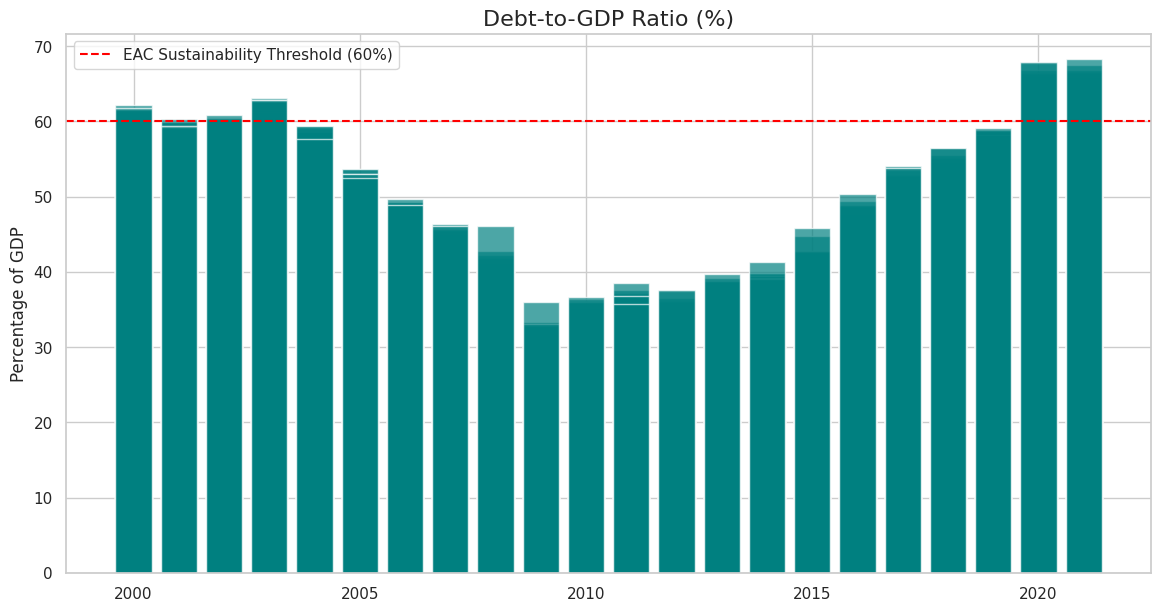

<Figure size 640x480 with 0 Axes>

In [13]:
# Debt-to-GDP Ratio over time
plt.figure(figsize=(14,7))
plt.bar(final_df['Year'], final_df['Debt_to_GDP (%)'], color='teal', alpha=0.7)
plt.axhline(60, color='red', linestyle='--',
            label='EAC Sustainability Threshold (60%)')
plt.title("Debt-to-GDP Ratio (%)", fontsize=16)
plt.ylabel('Percentage of GDP')
plt.legend()
plt.show()
plt.savefig('debt_to_gdp.png')

## There is a noticeable sharp decline in the Debt-to-GDP ratio around 2005-2009

## 2010-2014
## Gradual rise begins around 2010, the Debt to GDP ratio starts rising steadily marking the beginning of a persistent upward trend.

## 2015-2018
## Consistent growth there's  a strong and steady increase in the debt ratio

## 2019-2021
## Spike: Around these years the Debt-to-GDP ratio spikes significantly reaching its peak in 2021.

In [14]:
# Debt composition over the years
final_df['Domestic Debt Composition (%)'] = (final_df['Domestic Debt']/ final_df['Total']) * 100
final_df['External Debt Composition (%)'] = (final_df['External Debt']/final_df['Total']) * 100

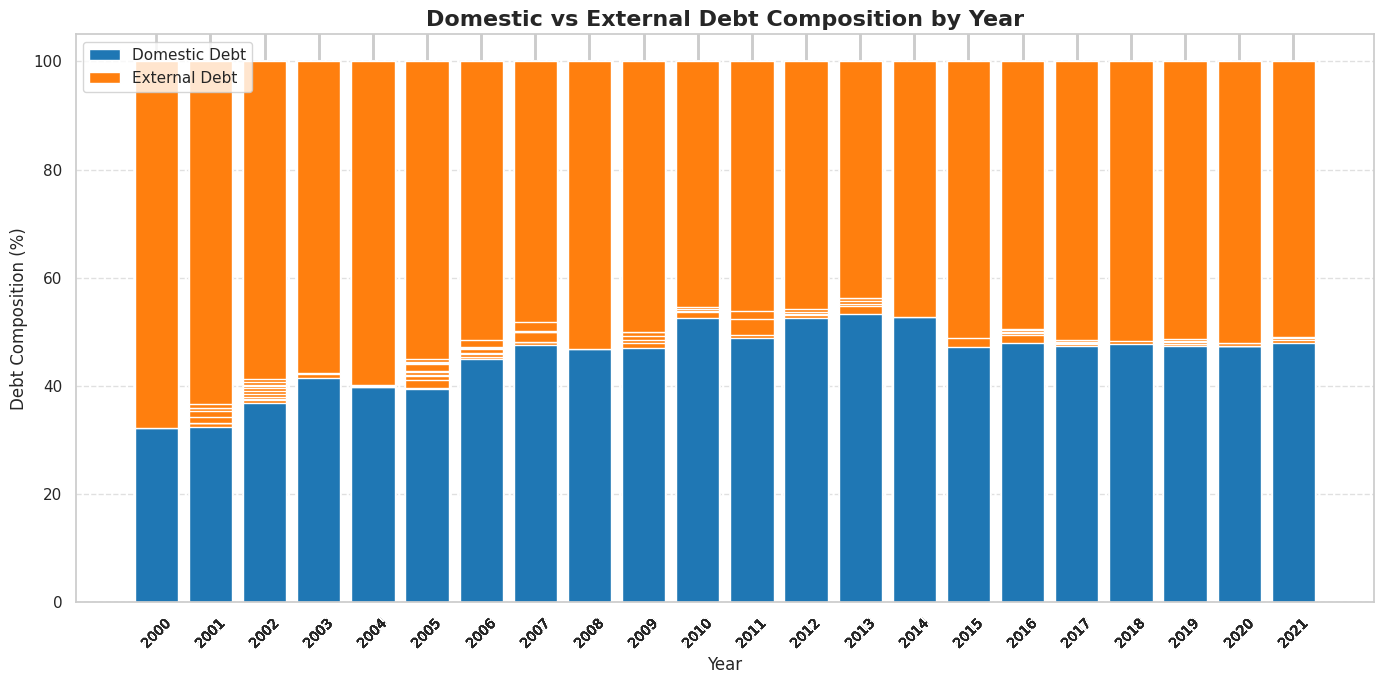

<Figure size 640x480 with 0 Axes>

In [16]:
# Plotting a stacked bar for domestic vs external debt by year
fig, ax = plt.subplots(figsize=(14,7))
# Plot for domestic debt
ax.bar(final_df['Year'], final_df['Domestic Debt Composition (%)'], label='Domestic Debt', color='#1f77b4')

# Plot for external debt, stacked on top of domestic
ax.bar(final_df['Year'], final_df['External Debt Composition (%)'],
       bottom=final_df['Domestic Debt Composition (%)'], label='External Debt', color='#ff7f0e')

# Title and labels
ax.set_title('Domestic vs External Debt Composition by Year', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Debt Composition (%)', fontsize=12)

# set x-axis xticks and labels
ax.set_xticks(final_df['Year'])
ax.set_xticklabels(final_df['Year'], rotation=45, fontsize=10)

# Add grid and legend
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.legend()

# adjust layout
plt.tight_layout()
plt.show()
plt.savefig('debt composition.png')

## Early Years 2000-2005
### External Debt dominates forming the larger portion of total debt

## Mid Period (2006-2015)
### There's a notable rise in domestic debt relative external debt
### At times domestic debt slightly exceeds external debt

## Recent Years (2017-2021):
### The two components seem to stabilize around a more balanced composition

In [17]:
# Export cleaned data
final_df.to_csv('kenya_debt_analytics_final.csv', index=False)
print("Analysis Complete. Files saved")

Analysis Complete. Files saved


#Insights
## 1. There's shift toward domestic borrowing.
## 2. The increased borrowing has pushed the debt-to-gdp ratio to unsustainable levels (Above EAC Sustainability Threshold 60%)